# **TASK 1: TITANIC SURVIVAL PREDICTION**

In [1]:
#Step 1: Importing Neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 2 : Laoding Dataset
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
#Step 3 : Data Exploration
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking Null Values
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Step 4: Data Cleaning
# Filling missing 'Age' values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [11]:
# Fill missing 'Embarked' values with the most common embarkation port
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
#Creating a new feature 'HasCabin' indicating whether a passenger had a cabin or not
titanic_data['HashCabin']= titanic_data['Cabin'].apply(lambda x : 0 if pd.isnull(x) else 1)

In [13]:
# Droping the 'Cabin' column as it has too many missing values
titanic_data.drop('Cabin', axis=1,inplace=True)

In [14]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


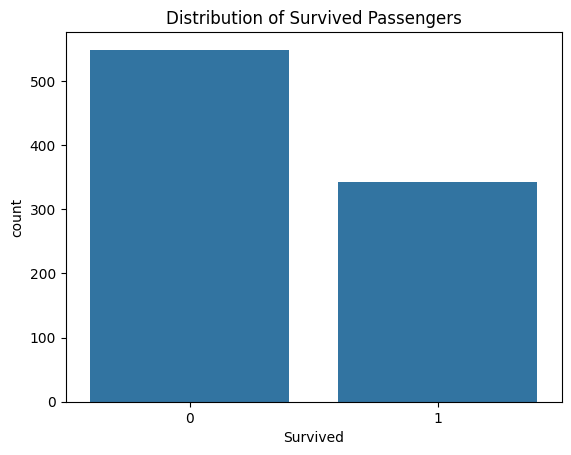

In [15]:
# Step 5: Data Visualization
# Visualizing the distribution of the 'Survived'Passengers
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribution of Survived Passengers')
plt.show()

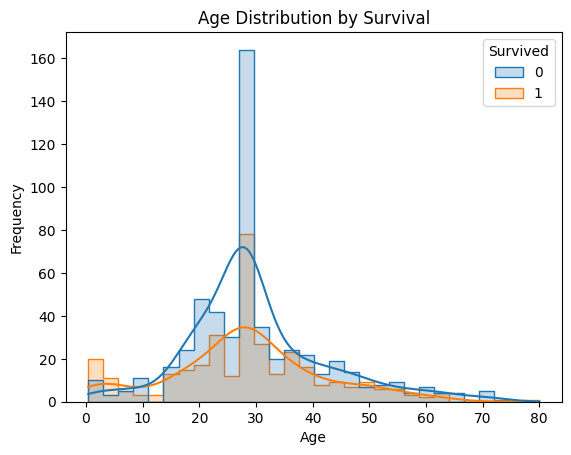

In [22]:
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True, element='step')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

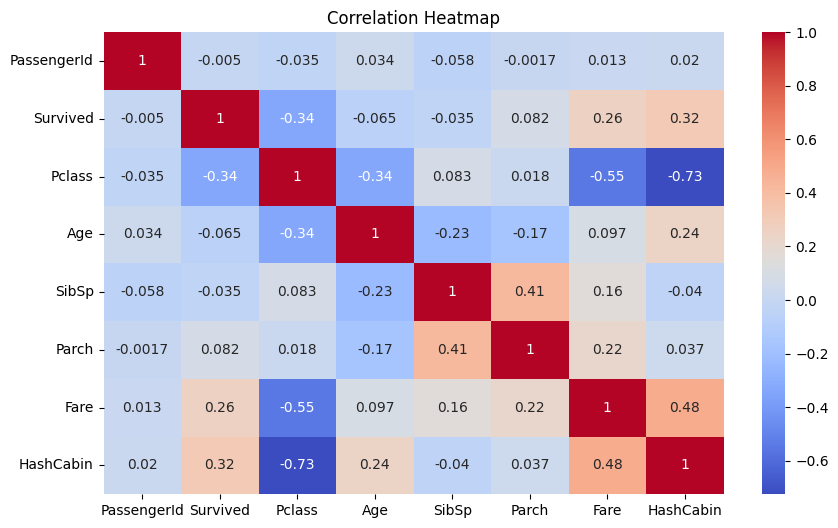

In [24]:
# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Step 6: Feature Engineering
# Convert categorical variables into numerical format using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
# Step 7: Data Preparation
# Define the feature set (X) and the target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Step 8: Model Building
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

In [33]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Step 9: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

In [35]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[92 13]
 [20 54]]


In [38]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

